In [26]:
# Clear all variables
%reset -f

## LAB 2 - TASK 2 OPTIONAL submission. ML 2023-24.


FILL UP THIS BOX WITH YOUR DETAILS

**NAME AND NIP**:

- Ignacio Pastore Benaim, 920576
- David Padilla Orenga, 946874

### FILL UP THIS BRIEF DESCRIPTION CIFAR-10 Dataset:

* Number of Classes: 10
* Name of the classes: airplane, 
automobile, bird, cat, deer, dog, frog, horse, ship, truck
* Source of the classes: https://www.cs.toronto.edu/~kriz/cifar.html

## 2. Training from scratch

In this exercise we are building a small conv net to train from scratch using Tensorflow.Keras APIs

## Get data and tensorflow imports ready

In [27]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import backend as K
from tensorflow.keras.datasets import cifar10


import matplotlib.pyplot as plt

## Load CIFAR-10

In [28]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_val, y_val) = cifar10.load_data()

#Printa shapes
print(f"x_train shape: {x_train.shape}")  
print(f"y_train shape: {y_train.shape}")  
print(f"x_val shape: {x_val.shape}")    
print(f"y_val shape: {y_val.shape}")    

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_val shape: (10000, 32, 32, 3)
y_val shape: (10000, 1)


In [29]:
# SOME HELPER FUNCTIONS TO VISUALIZE RESULTS
def vis_history(results_history):
    acc = results_history.history['accuracy']
    val_acc = results_history.history['val_accuracy']

    loss = results_history.history['loss']
    val_loss = results_history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

## Definning and training the CNN
You need to train 2 versions of this model. We choose to 
1) 
2) 

In [31]:
import keras

# dimensions of our images.
img_width, img_height = 32, 32  
nb_train_samples = 50000 
nb_validation_samples = 10000 
epochs = 10 
batch_size = 100 
num_classes = 10


if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)


train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(batch_size)
val_ds = tf.data.Dataset.from_tensor_slices((x_val, y_val)).batch(batch_size)

# for more optimized handling of the data
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)


## Model as previous task

In [32]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.1),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

model.save_weights('cifar-10_variation1.weights.h5')

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 32, 32, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 64)         

2024-11-24 21:11:42.226400: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


499/500 [============================>.] - ETA: 0s - loss: 1.5890 - accuracy: 0.4260

2024-11-24 21:11:49.042748: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


500/500 [==============================] - 8s 14ms/step - loss: 1.5886 - accuracy: 0.4261 - val_loss: 1.3796 - val_accuracy: 0.5116
Epoch 2/10
500/500 [==============================] - 7s 14ms/step - loss: 1.2501 - accuracy: 0.5585 - val_loss: 1.1636 - val_accuracy: 0.5869
Epoch 3/10
500/500 [==============================] - 7s 13ms/step - loss: 1.1324 - accuracy: 0.6016 - val_loss: 1.1456 - val_accuracy: 0.6041
Epoch 4/10
500/500 [==============================] - 7s 13ms/step - loss: 1.1312 - accuracy: 0.6118 - val_loss: 1.1751 - val_accuracy: 0.6037
Epoch 5/10
500/500 [==============================] - 7s 13ms/step - loss: 1.2385 - accuracy: 0.5995 - val_loss: 1.4250 - val_accuracy: 0.5685
Epoch 6/10
500/500 [==============================] - 7s 13ms/step - loss: 1.8016 - accuracy: 0.5560 - val_loss: 2.4390 - val_accuracy: 0.5224
Epoch 7/10
500/500 [==============================] - 7s 13ms/step - loss: 4.5056 - accuracy: 0.4806 - val_loss: 8.7144 - val_accuracy: 0.4574
Epoch 8/10

## Variation 1

In [ ]:
model2 = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.1),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model2.summary()

history2 = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

model2.save_weights('cifar-10_variation1.weights.h5')

## Variation 2

In [ ]:
model3 = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model3.summary()

history3 = model3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

model3.save_weights('cifar-10_variation2.weights.h5')

# Visualization

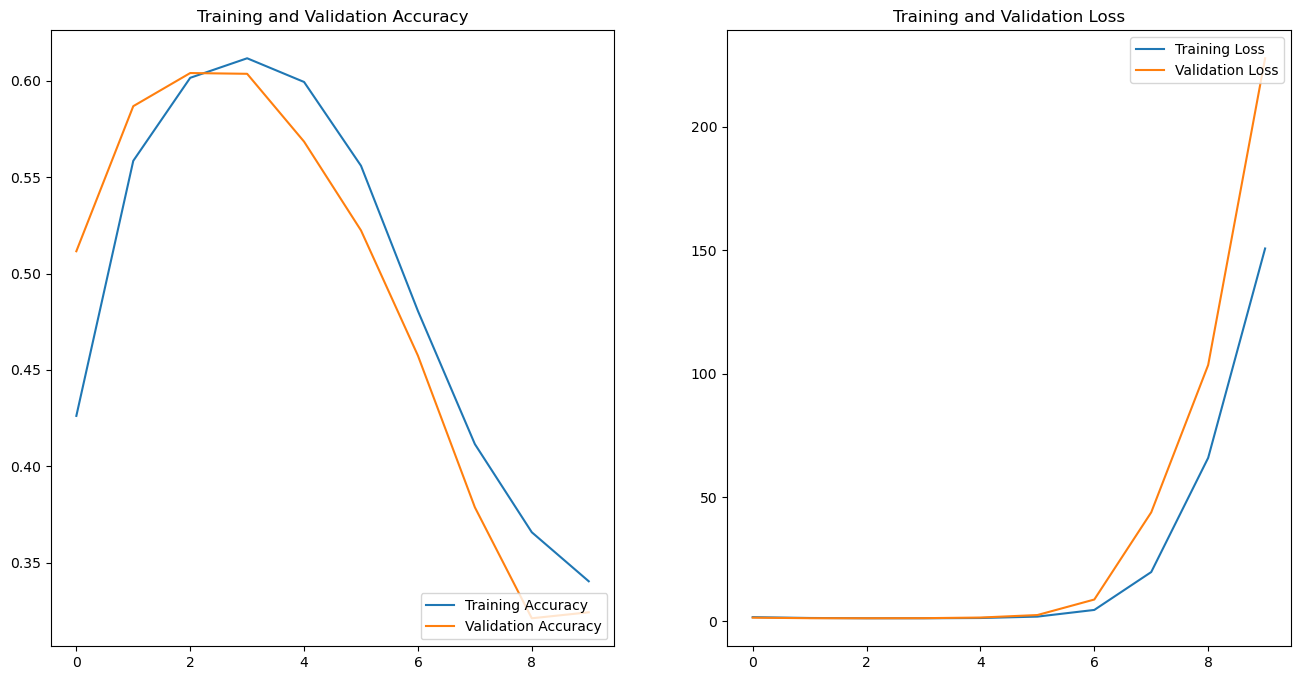

In [33]:
# VISUALIZE INITIAL RESULTS
vis_history(history)

In [ ]:
# PLOT HERE YOUR RESULTS WITHOUT DROPOUT
vis_history(history2)

In [ ]:
# PLOT HERE YOUR RESULTS WITHOUT DROPOUT
vis_history(history3)

### **QUESTION:** briefly discuss the results of the CNN with the different variations (

ANSWER:

## Witht vs whithout droput


## With vs without data augmentation
